In [1]:
import pandas as pd
df = pd.read_csv('../data/H117_votes.csv')
df = df[df['chamber'] == 'House']
df_formatd = pd.DataFrame()
for legis_name in list(df['icpsr'].unique()):
    all_votes_single_legislator = df[df['icpsr']==legis_name]

    d_votes = dict(zip(all_votes_single_legislator['rollnumber'], all_votes_single_legislator['cast_code']))
    d_votes = {f"vote_{k}": int(0) if v == 6 else int(1) for k, v in d_votes.items()}
    d_votes['icpsr'] = legis_name
    df_formatd = pd.concat([df_formatd, pd.DataFrame(d_votes, index=[0])])

vote_numbers = [col_name.split('_')[-1] for col_name in df_formatd.columns  if col_name.startswith('vote')]
#df_formatd = df_formatd.fillna(0)

real_data_formatd = df_formatd
members = pd.read_csv('../data/HS117_members.csv')
members = members[['icpsr', 'nominate_dim1', 'party_code', 'bioname']]
members.columns = ['icpsr', 'dwnom1d', 'party', 'legis_name']

real_data_formatd = real_data_formatd.merge(members, on = 'icpsr')
real_data_formatd

,vote_1,vote_2,vote_3,vote_4,vote_5,vote_6,vote_7,vote_8,vote_9,vote_10,...,vote_990,vote_991,vote_992,vote_993,vote_994,vote_995,vote_996,dwnom1d,party,legis_name
0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.283,200,"YOUNG, Donald Edwin"
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.334,200,"ROGERS, Harold Dallas (Hal)"
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.178,200,"SMITH, Christopher Henry"
3,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,-0.382,100,"HOYER, Steny Hamilton"
4,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,-0.164,100,"COOPER, James Hayes Shofner"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.556,200,"FINSTAD, Brad"
453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,-0.143,100,"PELTOLA, Mary Sattler"
454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,-0.230,100,"RYAN, Patrick"
455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.545,200,"SEMPOLINSKI, Joseph"


In [2]:
# Drop votes that are not partisan (everybody votes yes or is not present)
# Does not matter for H117, but may in some cases.
cols_to_drop = []
for col in ['vote_{}'.format(i) for i in vote_numbers]:
    if 0 not in list(set(real_data_formatd[col])) or 1 not in list(set(real_data_formatd[col])):
            cols_to_drop.append(col)
real_data_formatd = real_data_formatd.drop(columns=cols_to_drop)
vote_numbers = [col_name.split('_')[-1] for col_name in real_data_formatd.columns  if col_name.startswith('vote')]
real_data_formatd

,vote_1,vote_2,vote_3,vote_4,vote_5,vote_6,vote_7,vote_8,vote_9,vote_10,...,vote_990,vote_991,vote_992,vote_993,vote_994,vote_995,vote_996,dwnom1d,party,legis_name
0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.283,200,"YOUNG, Donald Edwin"
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.334,200,"ROGERS, Harold Dallas (Hal)"
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.178,200,"SMITH, Christopher Henry"
3,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,-0.382,100,"HOYER, Steny Hamilton"
4,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,-0.164,100,"COOPER, James Hayes Shofner"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.556,200,"FINSTAD, Brad"
453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,-0.143,100,"PELTOLA, Mary Sattler"
454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,-0.230,100,"RYAN, Patrick"
455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.545,200,"SEMPOLINSKI, Joseph"


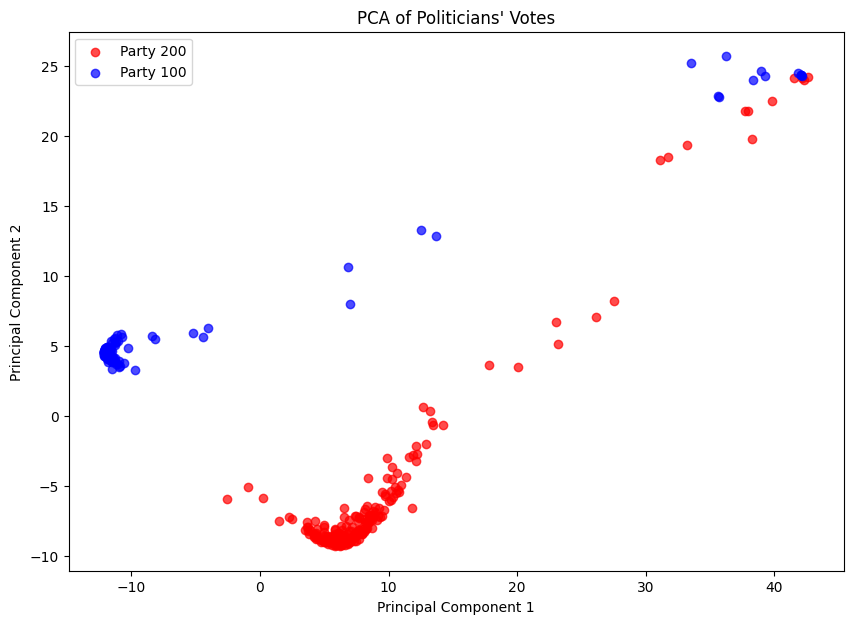

In [3]:
df = real_data_formatd

df.fillna(-1, inplace=True)

import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Selecting the vote columns for PCA
vote_columns = [col for col in df.columns if col.startswith("vote_")]
X = df[vote_columns]

# Performing PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
df['PC1'] = principal_components[:, 0]
df['PC2'] = principal_components[:, 1]

# Plotting
plt.figure(figsize=(10, 7))
colors = {100: 'blue', 200: 'red'}
for party in df['party'].unique():
    subset = df[df['party'] == party]
    plt.scatter(subset['PC1'], subset['PC2'], c=colors[party], label=f'Party {party}', alpha=0.7)
    
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Politicians' Votes")
plt.legend()
plt.show()


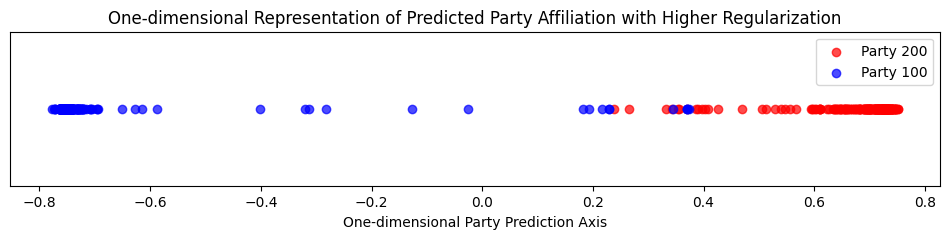

In [4]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

# Standardizing the vote columns for logistic regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y = df['party']

# Setting up penalized logistic regression with higher regularization strength
# Specifying higher values for Cs (more options for the regularization parameter)
log_reg = LogisticRegressionCV(cv=5, Cs=[0.0001], penalty='l2', scoring='accuracy', max_iter=1000, random_state=42)
log_reg.fit(X_scaled, y)

# Predicting probabilities of party affiliation (for axis plotting)
party_probabilities = log_reg.predict_proba(X_scaled)
# Using probability difference to create a one-dimensional axis representation
one_dim_representation = party_probabilities[:, 1] - party_probabilities[:, 0]

# Plotting the one-dimensional axis with adjusted regularization
plt.figure(figsize=(12, 2))
for party in df['party'].unique():
    subset = df[df['party'] == party]
    plt.scatter(one_dim_representation[subset.index], [0] * len(subset), c=colors[party], label=f'Party {party}', alpha=0.7)

plt.xlabel("One-dimensional Party Prediction Axis")
plt.title("One-dimensional Representation of Predicted Party Affiliation with Higher Regularization")
plt.yticks([])  # Hide y-axis
plt.legend()
plt.show()


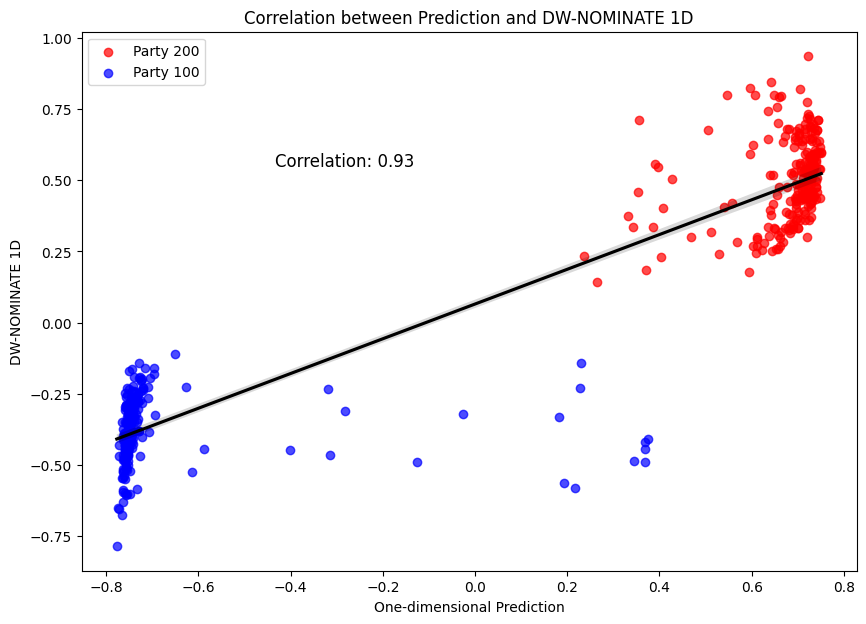

In [5]:
import numpy as np
import seaborn as sns

# Adding the one-dimensional predictions to the dataframe
df['one_dim_pred'] = one_dim_representation

# Calculating correlation between one-dimensional prediction and 'dwnom1d'
correlation = df[['one_dim_pred', 'dwnom1d']].corr().iloc[0, 1]

# Plotting the scatter plot with linear fit
plt.figure(figsize=(10, 7))
for party in df['party'].unique():
    subset = df[df['party'] == party]
    plt.scatter(subset['one_dim_pred'], subset['dwnom1d'], c=colors[party], label=f'Party {party}', alpha=0.7)

# Adding linear regression line
sns.regplot(x='one_dim_pred', y='dwnom1d', data=df, scatter=False, color='black', line_kws={"label":f"Correlation: {correlation:.2f}"})

# Displaying the correlation coefficient on the plot
plt.text(0.25, 0.75, f"Correlation: {correlation:.2f}", transform=plt.gca().transAxes, fontsize=12, color='black')

plt.xlabel("One-dimensional Prediction")
plt.ylabel("DW-NOMINATE 1D")
plt.title("Correlation between Prediction and DW-NOMINATE 1D")
plt.legend()
plt.show()

In [6]:
import sys
sys.path.append('../IdealPointNN/')
from dataset import IdealPointNNDataset
from ideal_point_model import IdealPointNN

train_data = IdealPointNNDataset(
    real_data_formatd,
)

train_data.add_modality(
    real_data_formatd,
    modality = 'vote',
    columns = ['vote_{}'.format(i) for i in vote_numbers]
)

/home/germain/Documents/neural_ideal_points/neural_ideal_point_models/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
train_datasets = [train_data]

In [8]:
encoder_args = {
    "encoder_input": "bow",
    "encoder_hidden_layers":[],
    "encoder_non_linear_activation":"relu",
    "encoder_bias":True
}

decoder_args = {
    "text": {
        "decoder_input": "bow",
        "decoder_hidden_layers":[],
        "decoder_non_linear_activation":"relu",
        "decoder_bias":True
    },
    "vote": {
        "decoder_hidden_layers":[],
        "decoder_non_linear_activation":"relu",
        "decoder_bias":True
    },
    "discrete_choice": {
        "decoder_hidden_layers":[],
        "decoder_non_linear_activation":None,
        "decoder_bias":True
    }
}

In [9]:
m = IdealPointNN(
    train_datasets,
    n_dims=1,
    encoder_args=encoder_args,
    decoder_args=decoder_args,
    update_prior=False,
    log_every_n_epochs = 1,
    dropout = 0,
    batch_size = 64,
    num_epochs = 100,
    w_prior = 1,
    learning_rate=1e-4,
    patience=10,
    seed = 1
)

Epoch   1	Mean Loss: 1.6356608

Epoch   2	Mean Loss: 1.1991170

Epoch   3	Mean Loss: 1.2388843

Epoch   4	Mean Loss: 1.1838800

Epoch   5	Mean Loss: 1.1231575

Epoch   6	Mean Loss: 1.1944127

Epoch   7	Mean Loss: 1.0569410

Epoch   8	Mean Loss: 1.1201761

Epoch   9	Mean Loss: 1.1032305

Epoch  10	Mean Loss: 1.1007253

Epoch  11	Mean Loss: 1.0683115

Epoch  12	Mean Loss: 1.0562009

Epoch  13	Mean Loss: 1.0302841

Epoch  14	Mean Loss: 1.0839009

Epoch  15	Mean Loss: 1.0446344

Epoch  16	Mean Loss: 1.0527151

Epoch  17	Mean Loss: 1.0938954

Epoch  18	Mean Loss: 1.1533727

Epoch  19	Mean Loss: 1.0918539

Epoch  20	Mean Loss: 1.0818564

Epoch  21	Mean Loss: 1.0010428

Epoch  22	Mean Loss: 0.9989386

Epoch  23	Mean Loss: 1.1537489

Epoch  24	Mean Loss: 1.0820495

Epoch  25	Mean Loss: 1.0450281

Epoch  26	Mean Loss: 0.9974233

Epoch  27	Mean Loss: 1.0082385

Epoch  28	Mean Loss: 0.9864197

Epoch  29	Mean Loss: 1.0471302

Epoch  30	Mean Loss: 1.0799131

Epoch  31	Mean Loss: 0.9574028

Epoch  3

In [10]:
ideal_points = m.get_ideal_points(train_datasets)

In [13]:
real_data_formatd['ideal_point'] = ideal_points

In [14]:
df = real_data_formatd

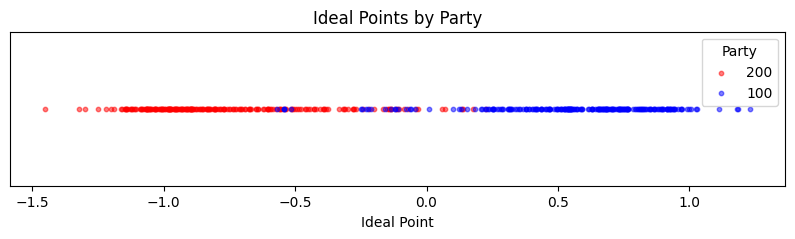

In [15]:
import matplotlib.pyplot as plt

# Define colors for each party
colors = {100: 'blue', 200: 'red'}

# Create a scatter plot
plt.figure(figsize=(10, 2))
for party in df['party'].unique():
    subset = df[df['party'] == party]
    plt.scatter(subset['ideal_point'], [1]*len(subset), color=colors[party], label=party, s=10, alpha = 0.5)

# Adding labels and title
plt.yticks([])  # Hide the y-axis
plt.xlabel('Ideal Point')
plt.title('Ideal Points by Party')
plt.legend(title='Party')

# Display the plot
plt.show()

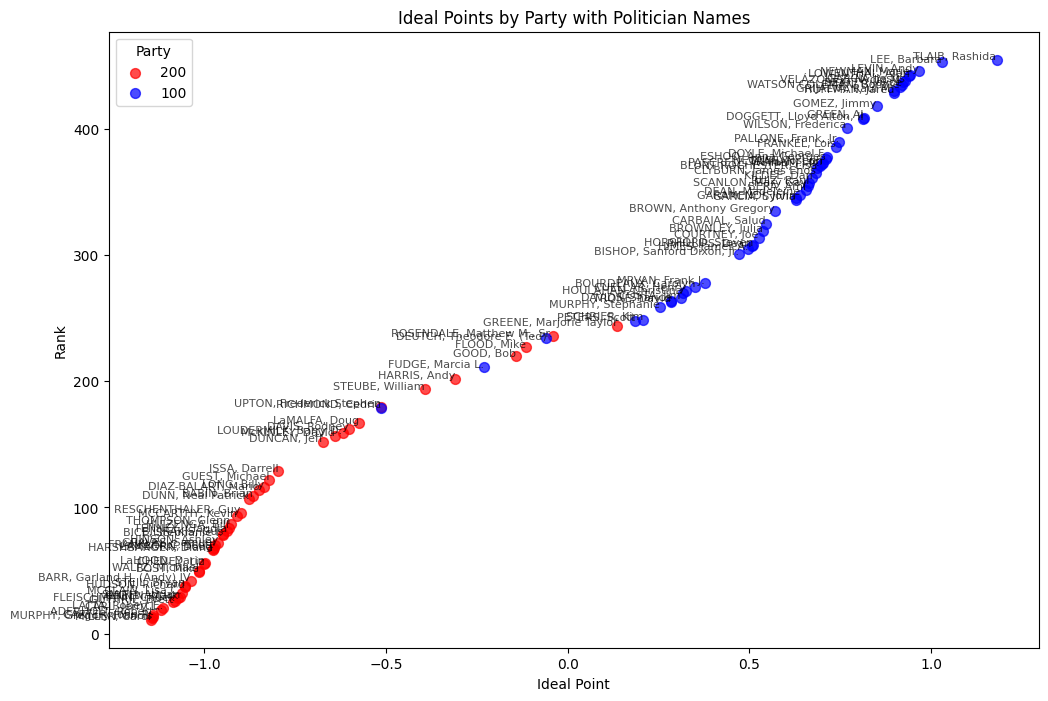

In [16]:
import matplotlib.pyplot as plt

# Define colors for each party
colors = {100: 'blue', 200: 'red'}

# Sort the DataFrame by 'ideal_point' to assign ranks
df_sorted = df.sort_values(by='ideal_point').reset_index(drop=True)
df_sorted['rank'] = df_sorted.index + 1

df_sorted = df_sorted.sample(100)

# Create a scatter plot
plt.figure(figsize=(12, 8))
for party in df_sorted['party'].unique():
    subset = df_sorted[df_sorted['party'] == party]
    plt.scatter(subset['ideal_point'], subset['rank'], color=colors[party], label=party, s=50, alpha=0.7)
    for _, row in subset.iterrows():
        plt.text(row['ideal_point'], row['rank'], row['legis_name'], fontsize=8, ha='right', alpha=0.7)

# Adding labels and title
plt.ylabel('Rank')
plt.xlabel('Ideal Point')
plt.title('Ideal Points by Party with Politician Names')
plt.legend(title='Party')

# Reverse the y-axis so that rank 1 is at the top
plt.gca() #.invert_yaxis()

# Display the plot
plt.show()


In [17]:
df[['legis_name', 'party', 'ideal_point']].sort_values(by = 'ideal_point')

,legis_name,party,ideal_point
439,"ELLZEY, Jake",200,-1.450373
139,"WALORSKI, Jackie",200,-1.321965
346,"FISCHBACH, Michelle",200,-1.297430
225,"GALLAGHER, Michael",200,-1.251394
436,"LETLOW, Julia",200,-1.217818
...,...,...,...
420,"LEE, Barbara",100,1.028855
338,"BUSH, Cori",100,1.112062
319,"TLAIB, Rashida",100,1.180148
298,"OCASIO-CORTEZ, Alexandria",100,1.183038
